#Data Quality Assesment

In [ ]:
# Import library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load dataset
df_melbourne = pd.read_csv('/content/drive/MyDrive/Cleaned Melbourne Housing Market.csv')

# Atur opsi tampilan
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 30)

In [ ]:
# Menampilkan lima baris pertama dari dataset Melbourne Housing Market
df_melbourne.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.000,S,Biggin,3/12/2016,2.500,3067.000,2.000,1.000,1.000,202.000,NaN,NaN,Yarra,-37.800,144.998,Northern Metropolitan,4019.000
1,Abbotsford,25 Bloomburg St,2,h,1035000.000,S,Biggin,4/02/2016,2.500,3067.000,2.000,1.000,0.000,156.000,79.000,1900.000,Yarra,-37.808,144.993,Northern Metropolitan,4019.000
2,Abbotsford,5 Charles St,3,h,1465000.000,SP,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,0.000,134.000,150.000,1900.000,Yarra,-37.809,144.994,Northern Metropolitan,4019.000
3,Abbotsford,40 Federation La,3,h,850000.000,PI,Biggin,4/03/2017,2.500,3067.000,3.000,2.000,1.000,94.000,NaN,NaN,Yarra,-37.797,144.997,Northern Metropolitan,4019.000
4,Abbotsford,55a Park St,4,h,1600000.000,VB,Nelson,4/06/2016,2.500,3067.000,3.000,1.000,2.000,120.000,142.000,2014.000,Yarra,-37.807,144.994,Northern Metropolitan,4019.000


In [ ]:
# Menampilkan jumlah baris dan kolom
df_melbourne.shape

(13580, 21)

##### Data yang diberikan merupakan data transaksi properti di Melbourne, yang mencakup informasi terkait properti seperti alamat, tipe properti, lokasi (suburb), cara penjualan, jumlah kamar, harga, agen real estate yang terlibat, tanggal penjualan, dan jarak properti tersebut dari pusat bisnis kota (CBD). Data tersebut terdiri dari 13580 baris dan 21 kolom.

In [ ]:
# Menampilkan nama-nama kolom dalam dataset
df_melbourne.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [ ]:
# Menampilkan informasi ringkas tentang dataset
df_melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

##### Berdasarkan output di atas, dapat dilihat bahwa ada beberapa kolom yang missing value dan tipe datanya tidak sesuai, yaitu kolom Date yang tipe datanya tidak sesuai dimana tipe data yang seharusnya adalah Datetime.

In [ ]:
# Menghitung jumlah nilai yang hilang (missing values) dalam setiap kolom dataset
df_melbourne.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

##### Output diatas memperlihatkan ada beberapa kolom yang terdapat missing value yaitu Car, BuildingArea, YearBuilt, dan CouncilArea.

In [ ]:
# Menghitung jumlah baris yang merupakan duplikat dari baris lainnya dalam dataset
df_melbourne.duplicated().sum()

0

##### Output diatas memperlihatkan bahwa tidak ada duplikasi data.

#Data Type Transformation

In [ ]:
#Mengubah data type kolom yg tipe datanya belum sesuai
df_melbourne['Date'] = pd.to_datetime(df_melbourne['Date'])

<ipython-input-16-b358229c23c3>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_melbourne['Date'] = pd.to_datetime(df_melbourne['Date'])


Data type pada kolom date masih belum sesuai karena type datanya berupa float, sehingga harus dirubah pada type datetime

In [ ]:
df_melbourne[['Rooms','Postcode','Bedroom2','Bathroom','Propertycount','Price']]=df_melbourne[['Rooms','Postcode','Bedroom2','Bathroom','Propertycount','Price']].astype(int)

Data type pada kolom-kolom di atas perlu dirubah ke integer karena tidak ada yang memuat koma

In [ ]:
df_melbourne.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

Output di atas menunjukkan tipe data kolom - kolom yang sudah sesuai

#Missing Values Handling

##### untuk handle missing value pada dataset melbourne_housing ini tidak ada penghapusan kolom karena dikhawatirkan dapat mengganggu kolom lain dalam menentukan sebuah analisis kedepannya dan treatment untuk missing value menggunakan beberapa metode yaitu mean,median dan modus tergantung pada kolom yang memiliki missing value

In [ ]:
df_melbourne.isnull().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car               True
Landsize         False
BuildingArea      True
YearBuilt         True
CouncilArea       True
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

##### untuk melihat apakah ada kolom yang missing value perintah diatas akan menunjukkan kolom mana saja yang missing value

In [ ]:
updated_df = df_melbourne
updated_df['Car']=updated_df['Car'].fillna(updated_df['Car'].median())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

##### untuk handle missing value dikolom car,diputuskan untuk menggunakan median karena dikolom car menunjukkan jumlah tempat parkir mobil di masing masing rumah,jika menggunakan mean maka hasil dari perhitungan nilai rata rata pada kolom car akan menghasilkan nilai berkoma,dan kenapa tidak menggunakan modus karena tipe data dari kolom car merupakan numeric

In [ ]:
updated_df = df_melbourne
updated_df['BuildingArea']=updated_df['BuildingArea'].fillna(updated_df['BuildingArea'].mean())
updated_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   13580 non-null  float64       
 15  YearBuilt      8205

##### untuk value yang missing pada kolom building area diisi dengan nilai rata rata dari kolom building area karena tipe data kolom building area adalah float64 dimana mean merupakan salah satu metode yang dapat diaplikasikan untuk mengisi nilai yang hilang

In [ ]:
updated_df = df_melbourne
updated_df['YearBuilt']=updated_df['YearBuilt'].fillna(updated_df['YearBuilt'].median())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  int64         
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  int64         
 10  Bedroom2       13580 non-null  int64         
 11  Bathroom       13580 non-null  int64         
 12  Car            13580 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   13580 non-null  float64       
 15  YearBuilt      1358

##### sama seperti kolom car,treatment untuk kolom year built adalah mengisi nilai yang hilang dengan nilai median yang ada di kolom year built,karena jika menggunakan mean maka hasilnya akan berkoma dan tidak cocok dengan data yang sudah ada sebelumnya

In [ ]:
council = df_melbourne['CouncilArea'].mode().values[0]
df_melbourne['CouncilArea'].fillna(council, inplace=True)

##### treatment untuk missing value kolom council area menggunakan nilai yang sering muncul pada kolom council area karena tipe data dari kolom council area merupakan categorikal

#Detecting and Handling Outliers

In [ ]:
df_melbourne.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000
mean,2.938,1075684.079,10.138,3105.302,2.915,1.534,1.612,558.416,151.968,1966.788,-37.809,144.995,7454.417
std,0.956,639310.724,5.869,90.677,0.966,0.692,0.961,3990.669,392.003,29.089,0.079,0.104,4378.582
min,1.000,85000.000,0.000,3000.000,0.000,0.000,0.000,0.000,0.000,1196.000,-38.183,144.432,249.000
25%,2.000,650000.000,6.100,3044.000,2.000,1.000,1.000,177.000,122.000,1960.000,-37.857,144.930,4380.000
50%,3.000,903000.000,9.200,3084.000,3.000,1.000,2.000,440.000,151.968,1970.000,-37.802,145.000,6555.000
75%,3.000,1330000.000,13.000,3148.000,3.000,2.000,2.000,651.000,151.968,1975.000,-37.756,145.058,10331.000
max,10.000,9000000.000,48.100,3977.000,20.000,8.000,10.000,433014.000,44515.000,2018.000,-37.409,145.526,21650.000


In [ ]:
kolom_dengan_outliers = ['Price', 'Distance',]

#####Alasan mmemeriksa outlier dalam kedua kolom price dan distance dapat memberikan gambaran lebih lengkap tentang tren atau anomali dalam data dan sifat datanya yang numerik.

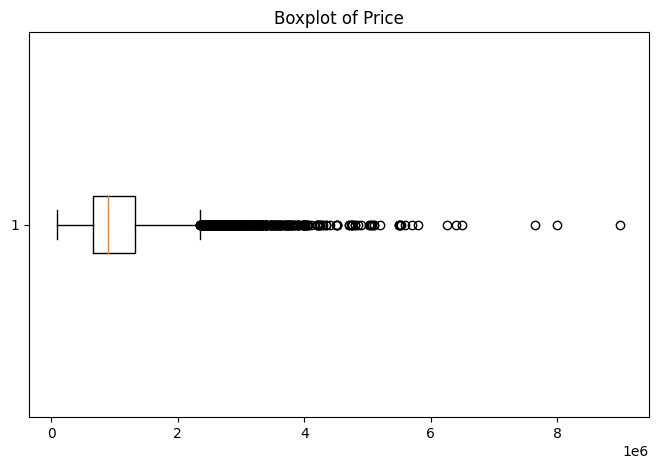

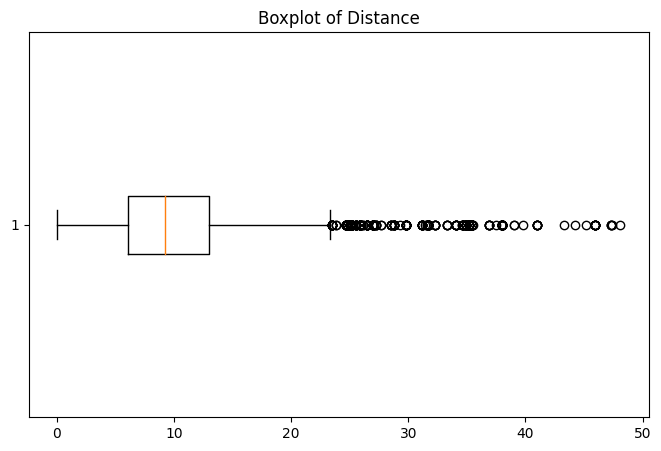

In [ ]:
for kolom in kolom_dengan_outliers:
    plt.figure(figsize=(8, 5))
    plt.boxplot(df_melbourne[kolom], vert=False)
    plt.title(f'Boxplot of {kolom}')
    plt.show()

####Detecting Outliers using the Z-scores

In [ ]:
def detect_outliers_zscore(data, kolom):
    outliers = []
    thres = 3
    mean = np.mean(kolom)
    std = np.std(kolom)

    for value in kolom:
        z_score = (value - mean) / std
        if np.abs(z_score) > thres:
            outliers.append(value)

    return outliers

for kolom in kolom_dengan_outliers:
  outliers = detect_outliers_zscore(df_melbourne, df_melbourne[kolom])
  print(f'Outliers in {kolom}: {outliers}')

Outliers in Price: [3010000, 4735000, 3755000, 3625000, 3000000, 5525000, 3660000, 3625000, 4200000, 3512500, 3510000, 3250000, 4000000, 3180000, 3600000, 3270000, 3000000, 3400000, 3290000, 3401000, 4000000, 3020000, 3900000, 3230000, 3300000, 3250000, 3690000, 3000000, 3360000, 4000000, 4000000, 3695000, 3700000, 3775000, 4250000, 3171000, 3180000, 3320000, 4700000, 3295888, 3700000, 3900000, 3050000, 3550000, 3751000, 3105000, 3207000, 3225000, 4760000, 3400000, 3300000, 3225000, 3320000, 4350000, 3800000, 3550000, 3400000, 3145000, 3010000, 3000000, 3572000, 3310000, 4011000, 3400000, 3400000, 3730000, 3110000, 3500000, 3085000, 3860000, 3010000, 3365000, 3250000, 3200000, 3470000, 3075000, 3201000, 3325000, 5100000, 3225000, 3950000, 4250000, 3500000, 5050000, 3750000, 3120000, 4800000, 4350000, 3550000, 4850000, 6500000, 3650000, 3280000, 4005000, 3065000, 3028000, 3460000, 3800000, 4700000, 3010000, 3400000, 4240000, 4525000, 3470000, 4802500, 3120000, 3900000, 3420000, 4300000,

####terlihat bahwa terdapat outliers pada kolom "Distance."danprice karrna Outliers nilai-nilainya jauh dari nilai sebagian besar data.

####Detecting Outliers using the Inter Quantile Range(IQR)

In [ ]:
outliers = []
def detect_outliers_iqr(data):
    df_melbourne = sorted(df_melbourne)
    q1 = np.percentile(df_melbourne, 25)
    q3 = np.percentile(df_melbourne, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
    outliers = detect_outliers_iqr(df_melbourne[kolom])
print(f'Outliers in {kolom}: {outliers}')

Outliers in Distance: []


####Dengan menggunakan IQR untuk mendeteksi outliers pada kolom seperti diatas hasilnya kosong, itu menunjukkan bahwa tidak ada data yang dianggap sebagai outliers berdasarkan metode deteksi yang digunakan diatas.

In [ ]:
def handle_outliers_replace_median(data, kolom):
    median = np.median(kolom)
    thres = 3

    for i in range(len(kolom)):
        z_score = (kolom[i] - median) / (1.4826 * np.median(np.abs(kolom - median)))
        if np.abs(z_score) > thres:
            # Gantilah nilai outlier dengan median
            kolom[i] = median

# Melakukan penggantian outliers dengan median untuk setiap kolom
for kolom in kolom_dengan_outliers:
    handle_outliers_replace_median(df_melbourne, df_melbourne[kolom])

<ipython-input-29-44025613f896>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kolom[i] = median


In [ ]:
print("DataFrame After Handling Outliers:")
print(df_melbourne)

DataFrame After Handling Outliers:
              Suburb           Address  Rooms Type    Price Method   SellerG  \
0         Abbotsford      85 Turner St      2    h  1480000      S    Biggin   
1         Abbotsford   25 Bloomburg St      2    h  1035000      S    Biggin   
2         Abbotsford      5 Charles St      3    h  1465000     SP    Biggin   
3         Abbotsford  40 Federation La      3    h   850000     PI    Biggin   
4         Abbotsford       55a Park St      4    h  1600000     VB    Nelson   
...              ...               ...    ...  ...      ...    ...       ...   
13575  Wheelers Hill      12 Strada Cr      4    h  1245000      S     Barry   
13576   Williamstown     77 Merrett Dr      3    h  1031000     SP  Williams   
13577   Williamstown       83 Power St      3    h  1170000      S     Raine   
13578   Williamstown      96 Verdon St      4    h   903000     PI   Sweeney   
13579     Yarraville        6 Agnes St      4    h  1285000     SP   Village   

    

##### untuk handle outliers pada dataset ini tidak ada penghapusan kolom karena dikhawatirkan dapat mengganggu kolom lain dalam menentukan sebuah analisis kedepannya untuk itu treatment yang digunakan yaitu dengan menggunakan metode median karena tipe data diatas numerik

#Descriptive Analysis

In [ ]:
df_melbourne.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000,13580.000
mean,2.938,965714.390,9.483,3105.302,2.915,1.534,1.612,558.416,151.968,1966.788,-37.809,144.995,7454.417
std,0.956,425520.744,4.472,90.677,0.966,0.692,0.961,3990.669,392.003,29.089,0.079,0.104,4378.582
min,1.000,85000.000,0.000,3000.000,0.000,0.000,0.000,0.000,0.000,1196.000,-38.183,144.432,249.000
25%,2.000,650000.000,6.100,3044.000,2.000,1.000,1.000,177.000,122.000,1960.000,-37.857,144.930,4380.000
50%,3.000,903000.000,9.200,3084.000,3.000,1.000,2.000,440.000,151.968,1970.000,-37.802,145.000,6555.000
75%,3.000,1228250.000,12.400,3148.000,3.000,2.000,2.000,651.000,151.968,1975.000,-37.756,145.058,10331.000
max,10.000,2275000.000,23.800,3977.000,20.000,8.000,10.000,433014.000,44515.000,2018.000,-37.409,145.526,21650.000


Berdasarkan descriptive statistics diatas, dapat diketahui bahwa :
1. Terdapat beberapa rumah yang tidak memiliki bedroom dan bathroom
2. Nilai YearBuilt terendah adalah 1196 yang kemungkinan merupakan salah entry
3. Range antara harga tertinggi dan terendah cukup besar yaitu 2 juta 275 ribu dollar dan 85 ribu dollar.
4. Terdapat beberapa rumah yang memiliki nilai 0 pada kolom car, landsize dan building area.


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Distance'}>],
       [<Axes: title={'center': 'Postcode'}>,
        <Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>],
       [<Axes: title={'center': 'Landsize'}>,
        <Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Lattitude'}>],
       [<Axes: title={'center': 'Longtitude'}>,
        <Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >]],
      dtype=object)

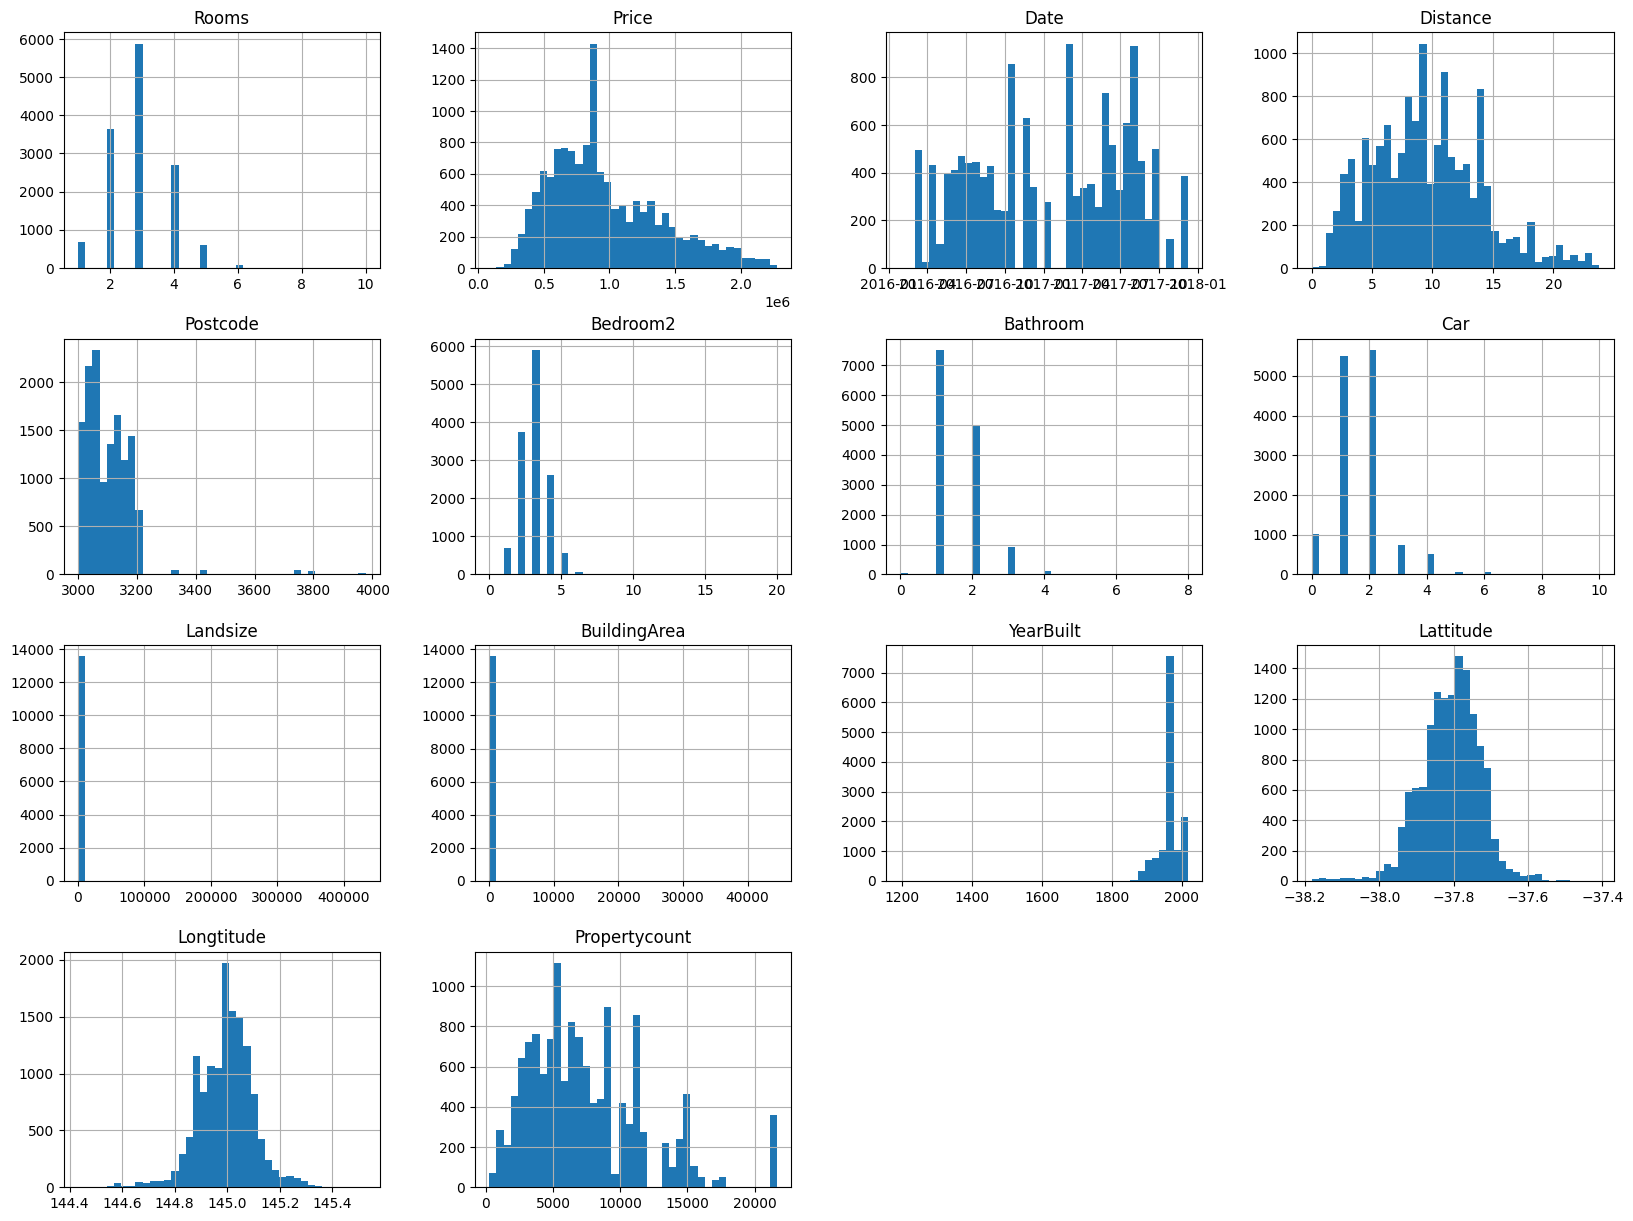

In [ ]:
df_melbourne.hist(bins=40, figsize=(20,15))

Berdasarkan histogram diatas dapat diketahui bahwa :  
1. Sekitar 50 % rumah tidak memiliki BuildingArea.
2. Sebagian besar rumah berada dalam jangkauan 15 km dari pusat kota.
3. Hampir semua rumah memiliki nilai Landsize 0.
4. Sebagian besar rumah berada pada longtitude 144.8 hingga 145.2 dan lattitude -38.0 hingga -37.6
5. Sebagian besar rumah memiliki 1 sampai 5 bedroom.
6. Lebih dari 50 % rumah hanya memiliki 1 bathroom.
7. Sebagian besar rumah hanya memiliki 1 sampai 2 parkir mobil.

In [ ]:
df_melbourne.count()

Suburb           13580
Address          13580
Rooms            13580
Type             13580
Price            13580
Method           13580
SellerG          13580
Date             13580
Distance         13580
Postcode         13580
Bedroom2         13580
Bathroom         13580
Car              13580
Landsize         13580
BuildingArea     13580
YearBuilt        13580
CouncilArea      13580
Lattitude        13580
Longtitude       13580
Regionname       13580
Propertycount    13580
dtype: int64

#Summary

Berdasarkan hasil descriptive analysis diatas, maka dapat disimpulkan bahwa :
1. Terdapat beberapa rumah yang tidak memiliki bedroom dan bathroom sehingga dapat diasumsikan pertama, data tersebut salah entry. Kedua, rumah tersebut memang tidak memiliki bedroom dan bathroom yang dikarenakan landsize dan ukuran bangunannya yang kecil sehingga harganya relatif murah.

2. Range antara harga tertinggi dan terendah cukup besar yaitu 2 juta 275 ribu dollar dan 85 ribu dollar. Jarak harga yang cukup jauh tersebut dapat dipengaruhi oleh suatu variabel contohnya seperti distance dimana harga rumah akan semakin mahal apabila jaraknya lebih dekat dengan pusat kota.

3. Terdapat beberapa rumah memiliki nilai 0 pada Landsize dan BuildingArea. Asumsinya rumah rumah tersebut merupakan apartemen sehingga Landsize dan BuildingArea bernilai 0.

4. Sebagian besar rumah dibangun pada tahun 1900 hingga 2000. Asumsinya variabel YearBuilt sama dengan distance dalam mempengaruhi harga price dimana rumah yang dibangun dibawah tahun 1950 kemungkinan besar harganya akan mahal.
5. Sebagian besar rumah berada dalam jangkauan 15 km dari pusat kota. Asumsinya rumah rumah yang jaraknya dekat dengan pusat kota merupakan rumah dengan tipe townhouse.

#Export Cleaned Data

In [ ]:
df_melbourne.to_csv('Cleaned Melbourne Housing Market 2.csv', index=False)